In [211]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [128]:


#npts=(pmax-pmin)/dpr
# npts=5000 # for p mesh
# nt=1000    # for time array
# maxTime=1
# time=np.linspace(0,maxTime,nt)
# beta=3.5 # velocity
# z=2.5     # vertical distance
# x=1.2     # horizontal distance
# R=np.sqrt(x**2+z**2) # ray length

#print('What is value of R/Beta?\n',r/beta, 'seconds')


In [59]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set")

def cartesian(arrays, out=None):
    """
    CREDIT: http://stackoverflow.com/questions/1208118/using-numpy-to-build-an-array-of-all-combinations-of-two-arrays
    
    Generate a cartesian product of input arrays.

    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.

    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.

    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])

    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out


Elapsed time is 0.5198349952697754 seconds.


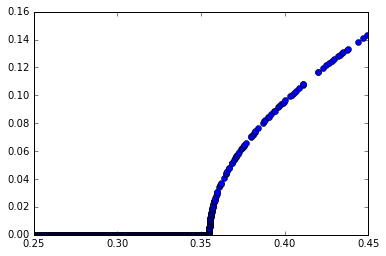

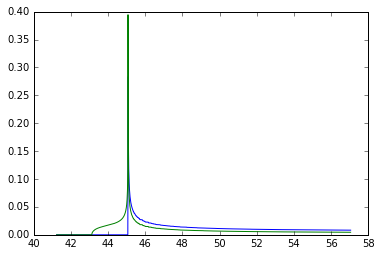

In [238]:
#####DOUG's way

#User inputs 
r=100.;
z=30.;
h=8;
beta0=2.5;
rho0=2.0;
beta=3.5;
rho=2.7;
mu0=(beta0*1.e05)**2*rho0;
mu=(beta*1.e05)**2*rho;

dt=0.01;
dpr=0.0001;
dpi=0.0001;
pmin=0.25;
pmax=0.45;
tres=0.0002;

tic() #start the clock

# generate an empty grid search domain for complex p
tmp1=np.arange(pmin,pmax+dpr,dpr)
tmp2=np.arange(0,pmax-pmin+dpi,dpi)
nn1=len(tmp1)
nn2=len(tmp2)
preal=np.tile(tmp1, [nn2,1]);
pimag=np.tile(tmp2, [nn1,1]);
p=preal + 1j*(pimag).T;

#calc t vector from p
t=p*r+(z-h)*np.sqrt(1/beta0**2-p**2) + (z)*np.sqrt(1/beta0**2-p**2);


# grid search for indicies of t that real
[k, l]=np.where(abs(np.imag(t)) < tres); 
#
tt=[]
pp=[]
cnt=0
for J in range(0,len(k)):
    if J==0:
        tt.append(np.real(t[k[J],l[J]]))
        pp.append(p[k[J],l[J]])
        cnt+=1
    elif np.real(t[k[J],l[J]]) > tt[cnt-1]:
        tt.append(np.real(t[k[J],l[J]]));
        pp.append(p[k[J],l[J]]);
        cnt+=1

toc() #stop the clock

#plot contour integration in p domain
plt.figure()
plt.plot(np.real(pp),np.imag(pp),'o')

#interpolate p(t) to regular t increment 
f=interpolate.interp1d(tt,pp);
xi=np.arange(tt[0],tt[cnt-1],dt);
yi = f(xi)

#  plot dp(t)/dt --> displacement potential --> seismogram
plt.figure()
dpdt=np.diff(yi)/0.01;
u=np.imag(dpdt*yi[:-1]**1.5/np.sqrt(1/beta0**2-yi[:-1]**2));
plt.plot(xi[:-1],u)

# Refection coefficient
R=(mu0*np.sqrt(1/beta0**2-yi[:-1]**2)-mu*np.sqrt(1/beta**2-yi[:-1]**2)
  )/(mu0*np.sqrt(1/beta0**2-yi[:-1]**2)+mu*np.sqrt(1/beta**2-yi[:-1]**2));
u2=np.imag(R*dpdt*yi[:-1]**1.5/np.sqrt(1/beta0**2-yi[:-1]**2));

plt.plot(xi[:-1],-1*u2)


[ 0.25    0.2501  0.2502 ...,  0.4498  0.4499  0.45  ]
Elapsed time is 0.0016012191772460938 seconds.


/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: RuntimeWarning: invalid value encountered in sqrt


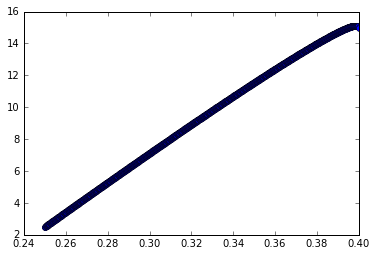

In [338]:
#####JES's way

#User inputs 
r=100.;
z=30.;
h=8;
beta0=2.5;
rho0=2.0;
beta=3.5;
rho=2.7;
mu0=(beta0*1.e05)**2*rho0;
mu=(beta*1.e05)**2*rho;

dt=0.01;
dpr=0.0001;
dpi=0.0001;
pmin=0.25;
pmax=0.45;
tres=0.0002;

tic() #start the clock

# 
p_real=np.arange(pmin,pmax+dpr,dpr)
print(p_real)

t=np.arange(0,(len(p))*dt,dt)

p_imag=t[:-1]-((z-h)*np.sqrt(1/beta0**2-p_real**2))+(z*np.sqrt(1/beta0**2-p_real**2));
#p_imag[0:1000]=0

toc()

#plot contour integration in p domain
plt.figure()
plt.plot(p_real,p_imag,'o')